In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import kneed
import itertools
import csv
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AffinityPropagation
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings
pd.options.display.max_rows = 4000
init_notebook_mode(connected=True)
warnings.filterwarnings(action='ignore')

In [11]:
os.getcwd()

'/Users/gabyherediabaek/marketing_campaign/mkt_campaign'

In [12]:
cd /Users/gabyherediabaek/marketing_campaign/mkt_campaign/Data

/Users/gabyherediabaek/marketing_campaign/mkt_campaign/Data


In [614]:
data= pd.read_csv('marketing_campaign.csv', sep='\t')

In [615]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [616]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [617]:
data.drop('ID', axis=1, inplace=True)

In [618]:
# CONSTANT VARIABLES
data['Z_Revenue'].describe()
data['Z_CostContact'].describe()
data.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [619]:
data.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [620]:
data.Income.isnull().sum()

24

In [621]:
data.loc[data['Income'].isnull()== True]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,...,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,...,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,...,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,...,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,...,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,...,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,...,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,...,1,7,6,0,0,0,0,0,0,0


In [622]:
# Replacing missing values of 'Income' with mean value of the respective group of education:
for i in range(0, data.shape[0]):
    if data.Income[i]!=data.Income[i]: # NaN!=Nan
        data.Income[i]=data['Income'].loc[data['Education']==data['Education'][i]].mean()

In [623]:
data.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [625]:
import resource
# Get memory usage information (in bytes)
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Convert memory usage to megabytes (MB)
mem_usage_mb = mem_usage / (1024 ** 2)

print("Memory usage:", mem_usage_mb, "MB")

Memory usage: 3106.57421875 MB


In [626]:
import gensim.downloader as api
# from gensim.models.word2vec import Word2Vec

# An API (Application Programming Interface) provides a structured and standardized way
# for developers to interact with and access the functionality or resources within a product,
# program, or system.

from multiprocessing import cpu_count
num_cpus = cpu_count()
print("Number of CPUs:", num_cpus)


if 'dataset' in locals() or 'dataset' in globals():
    pass
else:
    dataset = None
    
if dataset is not None:
    print("Dataset exists and was loaded successfully.")
else:
    dataset = api.load("word2vec-google-news-300") if dataset is None else dataset


Number of CPUs: 8
Dataset exists and was loaded successfully.


In [627]:
# Get memory usage information (in bytes)
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
# Convert memory usage to megabytes (MB)
mem_usage_mb = mem_usage / (1024 ** 2)
print("Memory usage:", mem_usage_mb, "MB")

Memory usage: 3106.57421875 MB


In [628]:
type(dataset['Widow'])
dataset['Graduation'][0:10]

numpy.ndarray

array([-0.28710938, -0.00427246, -0.20898438,  0.07226562,  0.09082031,
       -0.40234375,  0.18359375,  0.12597656,  0.09814453,  0.234375  ],
      dtype=float32)

In [629]:
    data['Dt_Customer'].min()
    data['Dt_Customer']= pd.to_datetime(arg=data['Dt_Customer'], infer_datetime_format= True)
    #Checking transformation:
    # data.dtypes
    # Creating an empty column to receive the transformed values of 'Dt_Customer':
    data['Dt_Customer_rel']= np.nan
    # For each client, attribute the value of 'Dt_Customer_rel' as the difference in days in relation to the oldest date of registration:
    for i in range(0, data.shape[0]):
        data['Dt_Customer_rel'][i]= abs(data['Dt_Customer'][i]-(data['Dt_Customer'].min()))

    pd.DataFrame(data['Dt_Customer_rel']).head()
    data['Dt_Customer_rel']= (data['Dt_Customer_rel']/np.timedelta64(1, 'D')).astype(int)
    #Checking:
    data['Dt_Customer_rel'].head()
    #Dropping the original date column of the dataset:
    data.drop('Dt_Customer', axis=1, inplace=True)

#     data['Dt_Customer_rel']= scaler.fit_transform(data['Dt_Customer_rel'].values.reshape(-1,1))
    # #Checking:
    data['Dt_Customer_rel'].head()
    

'01-01-2013'

,Dt_Customer_rel
0,92 days 00:00:00
1,938 days 00:00:00
2,591 days 00:00:00
3,998 days 00:00:00
4,742 days 00:00:00


0     92
1    938
2    591
3    998
4    742
Name: Dt_Customer_rel, dtype: int64

0     92
1    938
2    591
3    998
4    742
Name: Dt_Customer_rel, dtype: int64

In [630]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_rel
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,92
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,938
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,591
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,998
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,742


In [631]:
clean_data = data.copy()

In [632]:
clean_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_rel
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,92
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,938
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,591
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,998
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,742


Iteration 1
EMBEDDED MARITAL STATUS DONE
Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       ...
       'Marital_Status_290', 'Marital_Status_291', 'Marital_Status_292',
       'Marital_Status_293', 'Marital_Status_294', 'Marital_Status_295',
       'Marital_Status_296', 'Marital_Status_297', 'Marital_Status_298',
       'Marital_Status_299'],
      dtype='object', length=325)
EMBEDDED EDUCATION DONE
Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       ...
       'Education_290', 'Education_291', 'Education_292', 'Education_293',
       'Education_294', 'Education_295', 'Education_296', 'Education_297',
       'Education_298', 'Education_299'],
      dtype='object', length=624)


array([0.39534001, 0.19437815])

Varianza explicada en los dos primeros componentes: 0.5897181579264418
Con 11 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 48407.90


RangeIndex(start=0, stop=11, step=1)

Coeficiente de silueta promedio: 0.50 %
CH Score: 1522.71


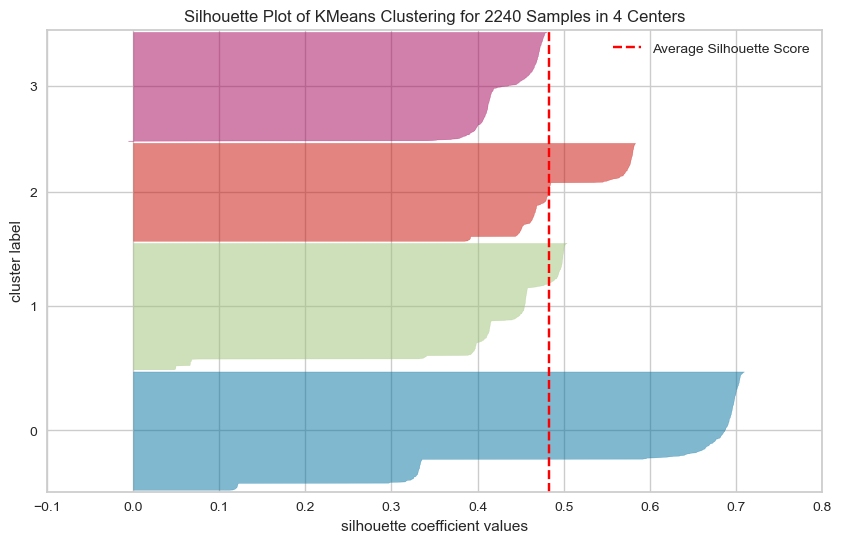

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.41
Para 2 clusters, o score CH é 1467.31
Para 3 clusters, o score de silhueta médio é 0.50
Para 3 clusters, o score CH é 1612.88
Para 4 clusters, o score de silhueta médio é 0.48
Para 4 clusters, o score CH é 1486.60
Para 5 clusters, o score de silhueta médio é 0.59
Para 5 clusters, o score CH é 1564.64
Para 6 clusters, o score de silhueta médio é 0.61
Para 6 clusters, o score CH é 1598.28
Para 7 clusters, o score de silhueta médio é 0.62
Para 7 clusters, o score CH é 1655.54
Para 8 clusters, o score de silhueta médio é 0.65
Para 8 clusters, o score CH é 1814.63
Para 9 clusters, o score de silhueta médio é 0.70
Para 9 clusters, o score CH é 2021.61
Para 10 clusters, o score de silhueta médio é 0.76
Para 10 clusters, o score CH é 2375.31
Iteration 1 : Word2Vec, Word2Vec

Iteration 2
EMBEDDED MARITAL STATUS DONE
Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'M

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       ...
       'Marital_Status_290', 'Marital_Status_291', 'Marital_Status_292',
       'Marital_Status_293', 'Marital_Status_294', 'Marital_Status_295',
       'Marital_Status_296', 'Marital_Status_297', 'Marital_Status_298',
       'Marital_Status_299'],
      dtype='object', length=325)

array([0.42504098, 0.32050577])

Varianza explicada en los dos primeros componentes: 0.745546745622149
Con 16 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 7128.60


RangeIndex(start=0, stop=16, step=1)

Coeficiente de silueta promedio: 0.78 %
CH Score: 5314.25


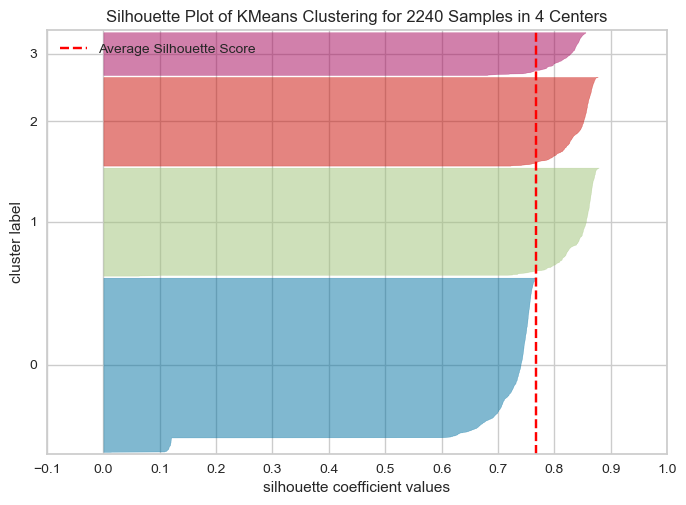

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.48
Para 2 clusters, o score CH é 1395.50
Para 3 clusters, o score de silhueta médio é 0.69
Para 3 clusters, o score CH é 3097.62
Para 4 clusters, o score de silhueta médio é 0.78
Para 4 clusters, o score CH é 5314.25
Para 5 clusters, o score de silhueta médio é 0.83
Para 5 clusters, o score CH é 12775.17
Para 6 clusters, o score de silhueta médio é 0.83
Para 6 clusters, o score CH é 11502.81
Para 7 clusters, o score de silhueta médio é 0.81
Para 7 clusters, o score CH é 10891.23
Para 8 clusters, o score de silhueta médio é 0.71
Para 8 clusters, o score CH é 11243.34
Para 9 clusters, o score de silhueta médio é 0.74
Para 9 clusters, o score CH é 9807.15
Para 10 clusters, o score de silhueta médio é 0.74
Para 10 clusters, o score CH é 9548.55
Iteration 2 : Word2Vec, Ordinal

Iteration 3
EMBEDDED MARITAL STATUS DONE
Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts',

Index(['Year_Birth', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Income', 'Kidhome', 'Teenhome',
       'Recency',
       ...
       'Marital_Status_290', 'Marital_Status_291', 'Marital_Status_292',
       'Marital_Status_293', 'Marital_Status_294', 'Marital_Status_295',
       'Marital_Status_296', 'Marital_Status_297', 'Marital_Status_298',
       'Marital_Status_299'],
      dtype='object', length=329)

array([0.41571872, 0.31348051])

Varianza explicada en los dos primeros componentes: 0.7291992291609111
Con 18 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 7926.59


RangeIndex(start=0, stop=18, step=1)

Coeficiente de silueta promedio: 0.74 %
CH Score: 4797.20


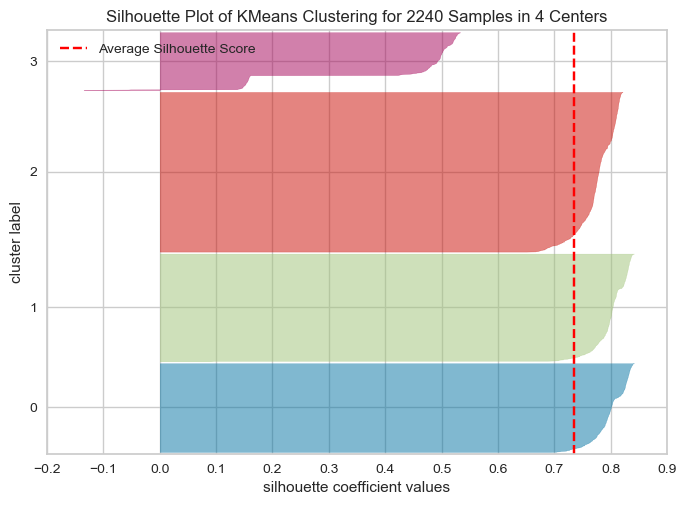

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.46
Para 2 clusters, o score CH é 1348.70
Para 3 clusters, o score de silhueta médio é 0.66
Para 3 clusters, o score CH é 2870.39
Para 4 clusters, o score de silhueta médio é 0.74
Para 4 clusters, o score CH é 4797.20
Para 5 clusters, o score de silhueta médio é 0.78
Para 5 clusters, o score CH é 8523.56
Para 6 clusters, o score de silhueta médio é 0.77
Para 6 clusters, o score CH é 8001.07
Para 7 clusters, o score de silhueta médio é 0.67
Para 7 clusters, o score CH é 7064.59
Para 8 clusters, o score de silhueta médio é 0.73
Para 8 clusters, o score CH é 6615.67
Para 9 clusters, o score de silhueta médio é 0.71
Para 9 clusters, o score CH é 6257.47
Para 10 clusters, o score de silhueta médio é 0.73
Para 10 clusters, o score CH é 6783.41
Iteration 3 : Word2Vec, One-hot

Iteration 4


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

EMBEDDED EDUCATION DONE
Index(['Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts',
       ...
       'Education_290', 'Education_291', 'Education_292', 'Education_293',
       'Education_294', 'Education_295', 'Education_296', 'Education_297',
       'Education_298', 'Education_299'],
      dtype='object', length=325)


array([0.62445651, 0.30594783])

Varianza explicada en los dos primeros componentes: 0.9304043421774404
Con 8 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 3, Inertia: 6540.59


RangeIndex(start=0, stop=8, step=1)

Coeficiente de silueta promedio: 0.87 %
CH Score: 14696.95


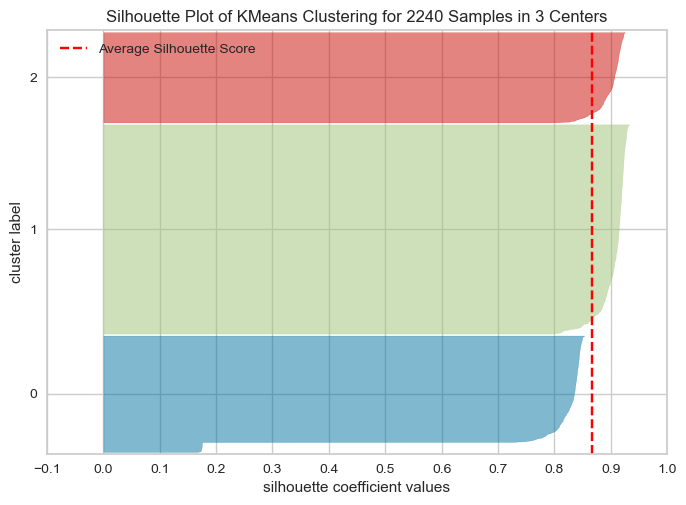

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.69
Para 2 clusters, o score CH é 3725.10
Para 3 clusters, o score de silhueta médio é 0.87
Para 3 clusters, o score CH é 14696.95
Para 4 clusters, o score de silhueta médio é 0.91
Para 4 clusters, o score CH é 48055.63
Para 5 clusters, o score de silhueta médio é 0.85
Para 5 clusters, o score CH é 43638.02
Para 6 clusters, o score de silhueta médio é 0.80
Para 6 clusters, o score CH é 38786.60
Para 7 clusters, o score de silhueta médio é 0.80
Para 7 clusters, o score CH é 35556.08
Para 8 clusters, o score de silhueta médio é 0.79
Para 8 clusters, o score CH é 35098.48
Para 9 clusters, o score de silhueta médio é 0.72
Para 9 clusters, o score CH é 33188.24
Para 10 clusters, o score de silhueta médio é 0.78
Para 10 clusters, o score CH é 32372.86
Iteration 4 : Ordinal, Word2Vec

Iteration 5


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.21570418, 0.12418875])

Varianza explicada en los dos primeros componentes: 0.3398929319113616
Con 23 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 5, Inertia: 1645.07


RangeIndex(start=0, stop=23, step=1)

Coeficiente de silueta promedio: 0.34 %
CH Score: 1389.69


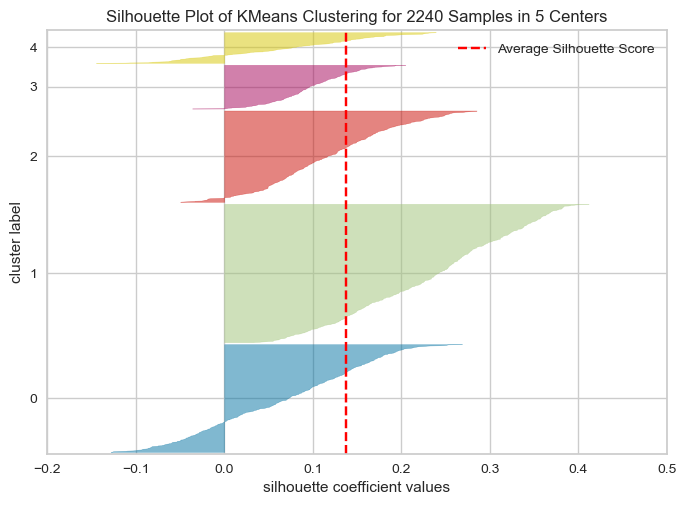

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.27
Para 2 clusters, o score CH é 701.69
Para 3 clusters, o score de silhueta médio é 0.28
Para 3 clusters, o score CH é 722.71
Para 4 clusters, o score de silhueta médio é 0.39
Para 4 clusters, o score CH é 1612.65
Para 5 clusters, o score de silhueta médio é 0.34
Para 5 clusters, o score CH é 1583.24
Para 6 clusters, o score de silhueta médio é 0.44
Para 6 clusters, o score CH é 2380.82
Para 7 clusters, o score de silhueta médio é 0.42
Para 7 clusters, o score CH é 2607.59
Para 8 clusters, o score de silhueta médio é 0.40
Para 8 clusters, o score CH é 2851.02
Para 9 clusters, o score de silhueta médio é 0.37
Para 9 clusters, o score CH é 2389.29
Para 10 clusters, o score de silhueta médio é 0.42
Para 10 clusters, o score CH é 2463.15
Iteration 5 : Ordinal, Ordinal

Iteration 6


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

ONE HOT ENCODING FOR EDUCATION IS DONE


Index(['Year_Birth', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.20235923, 0.14563288])

Varianza explicada en los dos primeros componentes: 0.3479921169356329
Con 25 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 5, Inertia: 2165.85


RangeIndex(start=0, stop=25, step=1)

Coeficiente de silueta promedio: 0.36 %
CH Score: 1601.16


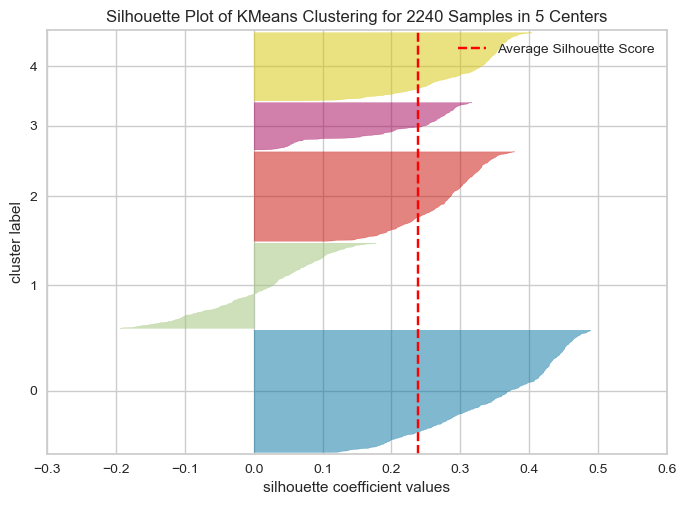

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.30
Para 2 clusters, o score CH é 966.08
Para 3 clusters, o score de silhueta médio é 0.35
Para 3 clusters, o score CH é 961.94
Para 4 clusters, o score de silhueta médio é 0.39
Para 4 clusters, o score CH é 1015.55
Para 5 clusters, o score de silhueta médio é 0.42
Para 5 clusters, o score CH é 1714.26
Para 6 clusters, o score de silhueta médio é 0.38
Para 6 clusters, o score CH é 1456.33
Para 7 clusters, o score de silhueta médio é 0.43
Para 7 clusters, o score CH é 1519.18
Para 8 clusters, o score de silhueta médio é 0.46
Para 8 clusters, o score CH é 2297.98
Para 9 clusters, o score de silhueta médio é 0.46
Para 9 clusters, o score CH é 2751.38
Para 10 clusters, o score de silhueta médio é 0.41
Para 10 clusters, o score CH é 1836.81
Iteration 6 : Ordinal, One-hot

Iteration 7
ONE HOT ENCODING FOR MARITAL STATUS IS DONE
EMBEDDED EDUCATION DONE
Index(['Year_Birth', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_Status_3', 'Marital

array([0.6139842 , 0.30082252])

Varianza explicada en los dos primeros componentes: 0.914806715955334
Con 11 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 3, Inertia: 8069.87


RangeIndex(start=0, stop=11, step=1)

Coeficiente de silueta promedio: 0.82 %
CH Score: 11986.53


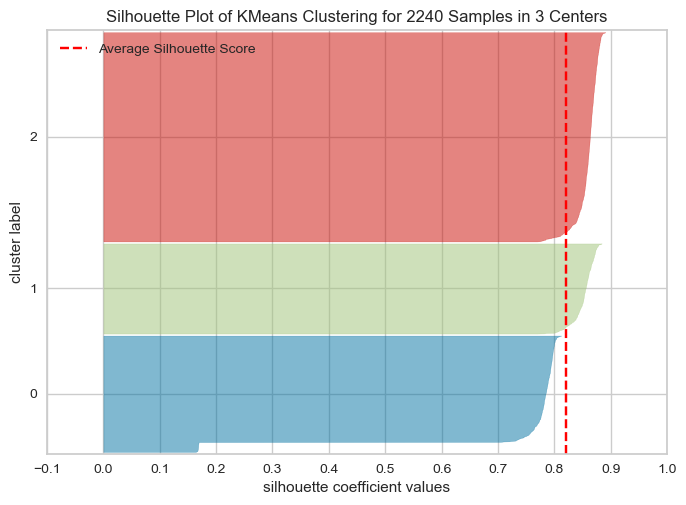

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.66
Para 2 clusters, o score CH é 3566.97
Para 3 clusters, o score de silhueta médio é 0.82
Para 3 clusters, o score CH é 11986.53
Para 4 clusters, o score de silhueta médio é 0.86
Para 4 clusters, o score CH é 23163.54
Para 5 clusters, o score de silhueta médio é 0.78
Para 5 clusters, o score CH é 20545.40
Para 6 clusters, o score de silhueta médio é 0.68
Para 6 clusters, o score CH é 18612.41
Para 7 clusters, o score de silhueta médio é 0.66
Para 7 clusters, o score CH é 17224.16
Para 8 clusters, o score de silhueta médio é 0.70
Para 8 clusters, o score CH é 16359.42
Para 9 clusters, o score de silhueta médio é 0.68
Para 9 clusters, o score CH é 15826.07
Para 10 clusters, o score de silhueta médio é 0.64
Para 10 clusters, o score CH é 16247.62
Iteration 7 : One-hot, Word2Vec

Iteration 8
ONE HOT ENCODING FOR MARITAL STATUS IS DONE


0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

Index(['Year_Birth', 'Education', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_Status_3', 'Marital_Status_4', 'Marital_Status_5',
       'Marital_Status_6', 'Marital_Status_7', 'Marital_Status_8', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.17647637, 0.1361788 ])

Varianza explicada en los dos primeros componentes: 0.31265517036758356
Con 25 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 2593.29


RangeIndex(start=0, stop=25, step=1)

Coeficiente de silueta promedio: 0.37 %
CH Score: 1197.33


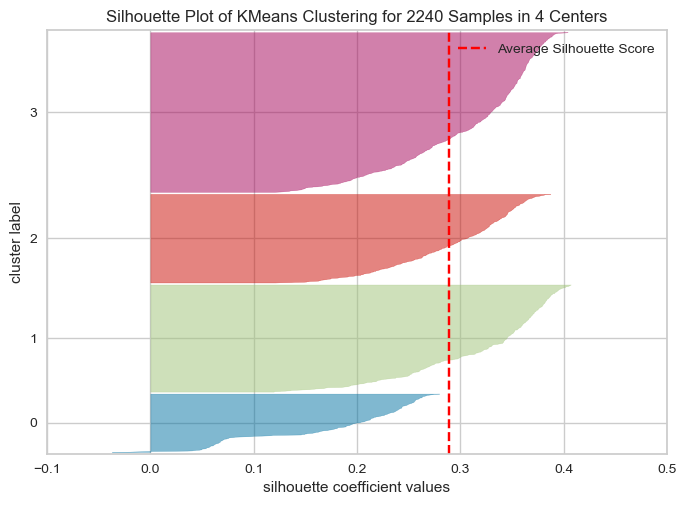

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.25
Para 2 clusters, o score CH é 691.63
Para 3 clusters, o score de silhueta médio é 0.33
Para 3 clusters, o score CH é 948.31
Para 4 clusters, o score de silhueta médio é 0.37
Para 4 clusters, o score CH é 1410.37
Para 5 clusters, o score de silhueta médio é 0.38
Para 5 clusters, o score CH é 1229.12
Para 6 clusters, o score de silhueta médio é 0.40
Para 6 clusters, o score CH é 1465.49
Para 7 clusters, o score de silhueta médio é 0.40
Para 7 clusters, o score CH é 1334.19
Para 8 clusters, o score de silhueta médio é 0.39
Para 8 clusters, o score CH é 1515.99
Para 9 clusters, o score de silhueta médio é 0.43
Para 9 clusters, o score CH é 1862.28
Para 10 clusters, o score de silhueta médio é 0.44
Para 10 clusters, o score CH é 2080.41
Iteration 8 : One-hot, Ordinal

Iteration 9
ONE HOT ENCODING FOR MARITAL STATUS IS DONE
ONE HOT ENCODING FOR EDUCATION IS DONE


Index(['Year_Birth', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_Status_3', 'Marital_Status_4', 'Marital_Status_5',
       'Marital_Status_6', 'Marital_Status_7', 'Marital_Status_8', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.14353489, 0.13537384])

Varianza explicada en los dos primeros componentes: 0.27890872654523047
Con 28 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 5, Inertia: 3547.19


RangeIndex(start=0, stop=28, step=1)

Coeficiente de silueta promedio: 0.30 %
CH Score: 972.80


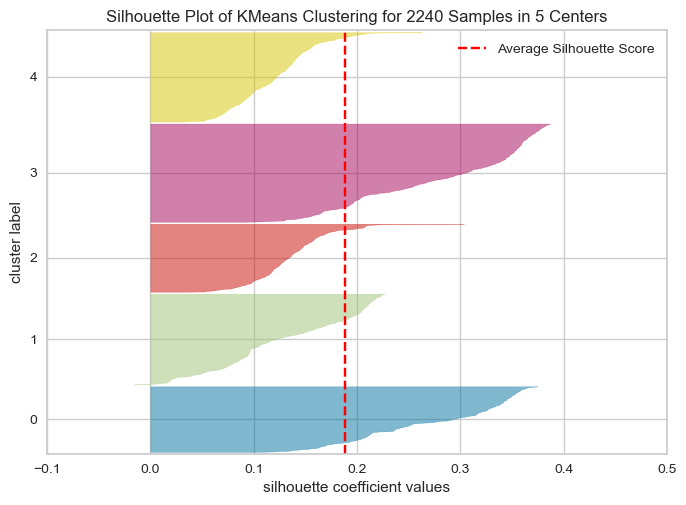

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=2))

Para 2 clusters, o score de silhueta médio é 0.18
Para 2 clusters, o score CH é 463.57
Para 3 clusters, o score de silhueta médio é 0.25
Para 3 clusters, o score CH é 660.66
Para 4 clusters, o score de silhueta médio é 0.25
Para 4 clusters, o score CH é 868.02
Para 5 clusters, o score de silhueta médio é 0.29
Para 5 clusters, o score CH é 1010.41
Para 6 clusters, o score de silhueta médio é 0.31
Para 6 clusters, o score CH é 1027.27
Para 7 clusters, o score de silhueta médio é 0.33
Para 7 clusters, o score CH é 1107.33
Para 8 clusters, o score de silhueta médio é 0.35
Para 8 clusters, o score CH é 1368.37
Para 9 clusters, o score de silhueta médio é 0.35
Para 9 clusters, o score CH é 1300.74
Para 10 clusters, o score de silhueta médio é 0.39
Para 10 clusters, o score CH é 2009.24
Iteration 9 : One-hot, One-hot



In [759]:
# Define embedding methods for marital status and education
encoding_marital = ['Word2Vec', 'Ordinal', 'One-hot']
encoding_education = ['Word2Vec', 'Ordinal', 'One-hot']

# # # To plot silhouette versus K:
# fig, ax = plt.subplots(figsize=(10, 6))
n_clusters = []
score = []
iteracion = []
marital_enc = []
educ_enc = []

# # Define the colormap
# colors = cm.tab10.colors
# x= 0.6
# y= 0.95

# Iterate over all combinations of embedding methods
index= 0
for marital_embedding, education_embedding in itertools.product(encoding_marital, encoding_education):
    marital_status_encoding = marital_embedding
    education_encoding= education_embedding
    data= clean_data.copy()
    
    print(f'Iteration {index+1}')
    if marital_status_encoding== 'One-hot':
        if 'Marital_Status' in data.columns:
            ohe= OneHotEncoder(cols=['Marital_Status'])
            data= ohe.fit_transform(data)
            print('ONE HOT ENCODING FOR MARITAL STATUS IS DONE') 
        else:
            print('process a was made in a previous iteration')
            
    elif marital_status_encoding== 'Ordinal':
        marital_cat= list(data['Marital_Status'].unique())
        ord_enc= OrdinalEncoder(categories=[marital_cat])
        ord_edu= pd.DataFrame(ord_enc.fit_transform(data[['Marital_Status']]))
        data['Marital_Status']= ord_edu
        data.columns
        data.loc[:, 'Marital_Status'].head()
            
    elif marital_status_encoding== 'Word2Vec':
        marital_status_vectors = {'Widow': dataset['Widow'],
                                  'Single': dataset['Single'],
                                  'Together': dataset['Together'],
                                  'Married': dataset['Married'],
                                  'Divorced': dataset['Divorced'],
                                  'Alone': dataset['Alone'],
                                  'YOLO': dataset['YOLO'],
                                  'Absurd': dataset['Absurd']
}
        for marital_status, vector in marital_status_vectors.items():
            # Create column names based on marital status
            column_names = [f'Marital_Status_{i}' for i in range(len(vector))]
            # Mask for rows where marital status matches
            mask = data['Marital_Status'] == marital_status
            # Assign values to corresponding columns
            data.loc[mask, column_names] = vector.tolist()
        data.drop('Marital_Status', axis=1, inplace= True)

        print('EMBEDDED MARITAL STATUS DONE')
        print(data.columns)
        
        
    if education_encoding == 'One-hot':
        if 'Education' in data.columns:
            ohe= OneHotEncoder(cols=['Education'])
            data= ohe.fit_transform(data)
            print('ONE HOT ENCODING FOR EDUCATION IS DONE')
            data.columns
#         else:
#             print('process b was made in a previous iteration')
            
    elif education_embedding== 'Ordinal':
        educ_cat= ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
        ord_enc= OrdinalEncoder(categories=[educ_cat])
        ord_edu= pd.DataFrame(ord_enc.fit_transform(data[['Education']]))
        data['Education']= ord_edu
        data.loc[:, 'Education'].head()
        data.columns
        
    elif education_encoding== 'Word2Vec':
#         Assuming 2n cycle and Master means the same thing. We can combine these two categories.
        data['Education'] = data['Education'].replace('2n Cycle', 'Master')
        education_vectors = {'Basic': dataset['Basic'],
                             'Master': dataset['Master'],
                             'PhD': dataset['PhD'],
                             'Graduation': dataset['Graduation'],
}
        # Iterate over each marital status and assign vectors to corresponding columns
        for education, vector in education_vectors.items():
            # Create column names based on marital status
            column_names = [f'Education_{i}' for i in range(len(vector))]
            mask = data['Education'] == education
            # Assign values to corresponding columns
            data.loc[mask, column_names] = vector.tolist()
        data.drop('Education', axis=1, inplace= True)
        print('EMBEDDED EDUCATION DONE')
        print(data.columns)
    

    # Scaling features:
    scaler= MinMaxScaler()
    num =[var for var in data.columns if data[var].dtypes!='object' and 'Accepted' not in var and 'Complain' not in var and 'Response' not in var]
#     num
    data[num]= scaler.fit_transform(data[num])
    
    pca = PCA(n_components= 2)
    data_pca = pca.fit_transform(data)
    pca.explained_variance_ratio_


    print('Varianza explicada en los dos primeros componentes:',
          pca.explained_variance_ratio_.sum())
    
    Explained_Variance = pca.explained_variance_ratio_.sum()
    
    for i in range(2, int(data.shape[1])):
        pca = PCA(n_components= i)
        data_pca = pca.fit_transform(data)
        if pca.explained_variance_ratio_.sum()>= 0.99:
            break
        
    percentage= "%.2f"%pca.explained_variance_ratio_.sum()
    print(f'Con {i} componentes representamos el {percentage}% de la varianza explicada por los componentes.')
    #Creating a new dataframe with the dataset turned into 25 PCA components:
    data_pca= pd.DataFrame(data_pca)
#     data_pca.head()
#     data_pca.columns
    
    # Defining the optimal number of clusters (K) by the elbow method:
    inertia=[]
    kmax= 8
    ks = list(range(2, kmax + 1))
    
    for i in range(2, kmax+1):
        clustering= KMeans(n_clusters=i, random_state=2).fit(data_pca)
        inertia.append(clustering.inertia_)
        
#     ax.plot(ks, inertia, label= index, color=colors[index % len(colors)])
#     plt.text(x, y, f'Embedding frame{index}: {marital_embedding}, {education_embedding}', 
#              horizontalalignment='left', verticalalignment='top', 
#              transform= ax.transAxes, fontsize=6, bbox= dict(facecolor='white', alpha=0.5))
#     ax.legend(title='Iteration', fontsize='small', title_fontsize='small')

#     Determining the point of inflection of the curve of inertia versus number of clusters:
    kneedle_kmeans= kneed.KneeLocator(y= inertia, x= ks, S= 1.0, curve= 'convex',
                                      direction= 'decreasing')
    inflection_point_kmeans= [kneedle_kmeans.knee, "%.2f"%kneedle_kmeans.knee_y]
    print(f'Inflection point: {inflection_point_kmeans[0]}, Inertia: {inflection_point_kmeans[1]}')
#     kneedle_kmeans.plot_knee()

    # Determining the optimal number of clusters (K) using the graph of silhouette score versus K:
    sil= []
    kmax= 8
    ks = list(range(2, kmax + 1))

    for k in range(2, kmax+1):
        clustering= KMeans(n_clusters=k, random_state=2).fit(data_pca)
        labels= clustering.labels_
        sil.append(silhouette_score(data_pca, labels, metric='euclidean'))

    # Plotting the graph of silhouette score versus K:
    n_clusters.append(ks)
    score.append(sil)
    iteracion.append(index + 1)
    marital_enc.append(marital_embedding)
    educ_enc.append(education_embedding)
    
#     ax.plot(ks, sil, label= f'Iteración {index+1}: {marital_embedding}, {education_embedding}',
#             color= colors[index % len(colors) ])
    
#     plt.rc('font', size= 9)

#     ax.legend(title= 'Esquema de codificación: Estado Civil, Educación', fontsize= 'small', title_fontsize= 'small')
#     plt.xlabel('Número de clusters', fontsize= 10)
#     plt.ylabel('Coeficiente de silueta', fontsize= 10)
    
    #Creating the model with inflection_point_kmeans (optimal K found by the elbow method):
    kmeans= KMeans(n_clusters= int(inflection_point_kmeans[0]), random_state=2).fit(data_pca)
    #Inserting the generated labels into a new column in the dataset:
    data_pca.columns
    data_pca['kmeans_labels'] = kmeans.labels_
#     data_pca.head()

    # Mean silhouette score:
    silhouette_avg_kmeans= silhouette_score(X= data_pca, labels= data_pca['kmeans_labels'])

    print('Coeficiente de silueta promedio:', "%.2f"%silhouette_avg_kmeans, '%')
    Silhouette = silhouette_avg_kmeans
    # Calinski Harabasz (CH) score:
    CH_kmeans= calinski_harabasz_score(X=data_pca, labels=data_pca['kmeans_labels'])
    print('CH Score:', "%.2f"%CH_kmeans)
    Calinski_Harabasz = CH_kmeans
    
    # Silhouette plot:
    silhouette_visualizer(kmeans, data_pca.drop('kmeans_labels', axis=1), colors='yellowbrick')
    
    # Iterating to check the mean silhouette score and the CH score for other values of K:
    kmax= 10 # Valor máximo de clusters deseado
    
    for i in range(2, kmax+1):
        # Creating the model:
        kmeans= KMeans(n_clusters=i, random_state=2).fit(data_pca)
        # Integrating the classification created by KMeans to the original dataset:
        data_pca['kmeans_labels']=kmeans.labels_
        # Mean silhouette score:
        silhouette_avg_kmeans= silhouette_score(X= data_pca, labels= data_pca['kmeans_labels'], metric= 'euclidean')
        # CH score:
        CH_kmeans= calinski_harabasz_score(X=data_pca, labels=data_pca['kmeans_labels'])
        print('Para {} clusters, o score de silhueta médio é {}'.format(i, "%.2f"%silhouette_avg_kmeans))
        print('Para {} clusters, o score CH é {}'.format(i, "%.2f"%CH_kmeans))
        
        results = [
            {'Experiment': index+1,
             'Dimensions': data.shape[1],
             'Clusters': int(inflection_point_kmeans[0]),
             'Marital_Status_Encoding': marital_status_encoding,
             'Education_Encoding': education_encoding,
             'Calinski-Harabasz': Calinski_Harabasz,
             'Silhouette': Silhouette ,
             'Explained Variance': Explained_Variance }
     ]

    # Define the header of the CSV file
        keys= [key for key in results[0].keys()]

    # Create a DataFrame from the results
        results_df = pd.DataFrame(results)

    # Save the DataFrame to a CSV file
    if os.path.exists('experiment_results.csv'):
        results_df = pd.read_csv('experiment_results.csv')
        new_results = results
    # Append the new results to the DataFrame
        results_df = results_df.append(new_results, ignore_index=True)
    # Save the updated DataFrame to the CSV file
        results_df.to_csv('experiment_results.csv', index=False)
    else:
    # If the CSV file doesn't exist, initialize an empty DataFrame
        results_df.to_csv('experiment_results.csv', index=False)
    
    print(f'Iteration {index+1} : {marital_status_encoding}, {education_encoding}')
    index += 1
    print()

In [778]:
# # Plotting the graph of silhouette score versus K:
# n_clusters
# score
# iteracion
# marital_enc
# educ_enc

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Coeficiente de silueta')

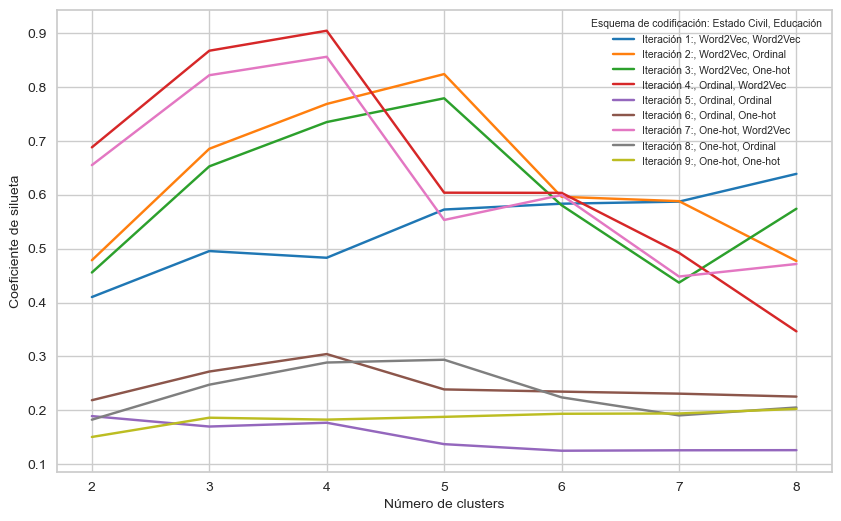

In [786]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.tab10.colors

for i in list(range(9)):
    ks = n_clusters[i]
    sil = score[i]
#     iteracion[i]
#     marital_enc[i], educ_enc[i]
    label = f'Iteración {iteracion[i]}:, {marital_enc[i]}, {educ_enc[i]}'
    ax.plot(ks, sil, label = f'Iteración {iteracion[i]}:, {marital_enc[i]}, {educ_enc[i]}',
            color= colors[i % len(colors)])

    plt.rc('font', size= 9)

    ax.legend(title= 'Esquema de codificación: Estado Civil, Educación', fontsize= 'small', title_fontsize= 'small')
    plt.xlabel('Número de clusters', fontsize= 10)
    plt.ylabel('Coeficiente de silueta', fontsize= 10)